## 2. Machine Learning for Regression


In [1]:
import pandas as pd
import numpy as np

## 2.2 Data preparation

In [2]:
# Define the URL for the dataset
data = 'https://raw.githubusercontent.com/alexeygrigorev/mlbookcamp-code/master/chapter-02-car-price/data.csv'

In [3]:
!wget $data 

--2025-11-20 01:00:26--  https://raw.githubusercontent.com/alexeygrigorev/mlbookcamp-code/master/chapter-02-car-price/data.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.108.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 

200 OK
Length: 1475504 (1.4M) [text/plain]
Saving to: ‘data.csv.1’

data.csv.1          100%[===================>]   1.41M  --.-KB/s    in 0.05s   

2025-11-20 01:00:26 (31.1 MB/s) - ‘data.csv.1’ saved [1475504/1475504]



In [4]:
df = pd.read_csv('data.csv')

In [5]:
df.head(3)

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350


Since there are some inconsistencies in the column names (sometimes they contain underscores, sometimes spaces), we need to do some data cleaning first. Let's standardize it, for example, converting all names to lowercase and replacing spaces with underscores to make them consistent.

In [6]:
df.columns = df.columns.str.lower().str.replace(' ', '_')

In [7]:
df.head(3)

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,msrp
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350


To standardize the values in a DataFrame, we first need to explore what’s inside the columns and check their data types.

We’re interested in columns that have the object data type, since they usually contain categorical or text data.

In [8]:
df.make.str.lower().str.replace(' ', '_')

0            bmw
1            bmw
2            bmw
3            bmw
4            bmw
          ...   
11909      acura
11910      acura
11911      acura
11912      acura
11913    lincoln
Name: make, Length: 11914, dtype: object

In [9]:
df.dtypes

make                  object
model                 object
year                   int64
engine_fuel_type      object
engine_hp            float64
engine_cylinders     float64
transmission_type     object
driven_wheels         object
number_of_doors      float64
market_category       object
vehicle_size          object
vehicle_style         object
highway_mpg            int64
city_mpg               int64
popularity             int64
msrp                   int64
dtype: object

In [10]:
# Select columns with 'object' data type and get access their indices
strings = list(df.dtypes[df.dtypes == 'object'].index)
strings

['make',
 'model',
 'engine_fuel_type',
 'transmission_type',
 'driven_wheels',
 'market_category',
 'vehicle_size',
 'vehicle_style']

In [11]:
for col in strings:
    df[col] = df[col].str.lower().str.replace(' ', '_')

In [12]:
df.dtypes

make                  object
model                 object
year                   int64
engine_fuel_type      object
engine_hp            float64
engine_cylinders     float64
transmission_type     object
driven_wheels         object
number_of_doors      float64
market_category       object
vehicle_size          object
vehicle_style         object
highway_mpg            int64
city_mpg               int64
popularity             int64
msrp                   int64
dtype: object

## 2.3 Exploratory data analysis

In [13]:
df.columns

Index(['make', 'model', 'year', 'engine_fuel_type', 'engine_hp',
       'engine_cylinders', 'transmission_type', 'driven_wheels',
       'number_of_doors', 'market_category', 'vehicle_size', 'vehicle_style',
       'highway_mpg', 'city_mpg', 'popularity', 'msrp'],
      dtype='object')

In [14]:
#Let's see what we actually have in each column
for col in df.columns:
    print(col)
    print(df[col].unique()[:5]) #show first 5 unique values
    print(df[col].nunique()) #number of unique values
    print()

make
['bmw' 'audi' 'fiat' 'mercedes-benz' 'chrysler']
48

model
['1_series_m' '1_series' '100' '124_spider' '190-class']
914

year
[2011 2012 2013 1992 1993]
28

engine_fuel_type
['premium_unleaded_(required)' 'regular_unleaded'
 'premium_unleaded_(recommended)' 'flex-fuel_(unleaded/e85)' 'diesel']
10

engine_hp
[335. 300. 230. 320. 172.]
356

engine_cylinders
[ 6.  4.  5.  8. 12.]
9

transmission_type
['manual' 'automatic' 'automated_manual' 'direct_drive' 'unknown']
5

driven_wheels
['rear_wheel_drive' 'front_wheel_drive' 'all_wheel_drive'
 'four_wheel_drive']
4

number_of_doors
[ 2.  4.  3. nan]
3

market_category
['factory_tuner,luxury,high-performance' 'luxury,performance'
 'luxury,high-performance' 'luxury' 'performance']
71

vehicle_size
['compact' 'midsize' 'large']
3

vehicle_style
['coupe' 'convertible' 'sedan' 'wagon' '4dr_hatchback']
16

highway_mpg
[26 28 27 25 24]
59

city_mpg
[19 20 18 17 16]
69

popularity
[3916 3105  819  617 1013]
48

msrp
[46135 40650 36350 29450 345

In [15]:
df

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,msrp
0,bmw,1_series_m,2011,premium_unleaded_(required),335.0,6.0,manual,rear_wheel_drive,2.0,"factory_tuner,luxury,high-performance",compact,coupe,26,19,3916,46135
1,bmw,1_series,2011,premium_unleaded_(required),300.0,6.0,manual,rear_wheel_drive,2.0,"luxury,performance",compact,convertible,28,19,3916,40650
2,bmw,1_series,2011,premium_unleaded_(required),300.0,6.0,manual,rear_wheel_drive,2.0,"luxury,high-performance",compact,coupe,28,20,3916,36350
3,bmw,1_series,2011,premium_unleaded_(required),230.0,6.0,manual,rear_wheel_drive,2.0,"luxury,performance",compact,coupe,28,18,3916,29450
4,bmw,1_series,2011,premium_unleaded_(required),230.0,6.0,manual,rear_wheel_drive,2.0,luxury,compact,convertible,28,18,3916,34500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11909,acura,zdx,2012,premium_unleaded_(required),300.0,6.0,automatic,all_wheel_drive,4.0,"crossover,hatchback,luxury",midsize,4dr_hatchback,23,16,204,46120
11910,acura,zdx,2012,premium_unleaded_(required),300.0,6.0,automatic,all_wheel_drive,4.0,"crossover,hatchback,luxury",midsize,4dr_hatchback,23,16,204,56670
11911,acura,zdx,2012,premium_unleaded_(required),300.0,6.0,automatic,all_wheel_drive,4.0,"crossover,hatchback,luxury",midsize,4dr_hatchback,23,16,204,50620
11912,acura,zdx,2013,premium_unleaded_(recommended),300.0,6.0,automatic,all_wheel_drive,4.0,"crossover,hatchback,luxury",midsize,4dr_hatchback,23,16,204,50920


Distribution of price

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

# line below is needed to show plots in Jupyter notebooks
%matplotlib inline 

<Axes: xlabel='msrp', ylabel='Count'>

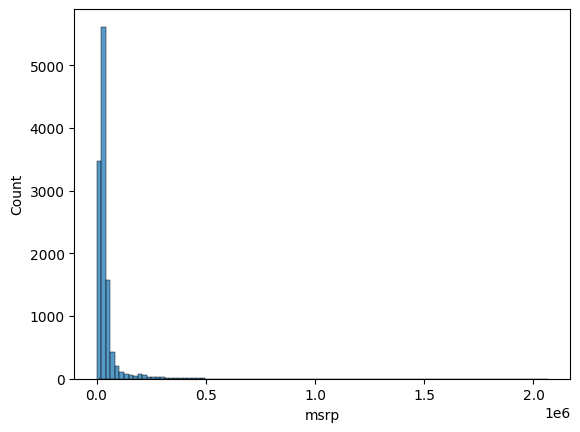

In [17]:
sns.histplot(df.msrp, bins=100)

<Axes: xlabel='msrp', ylabel='Count'>

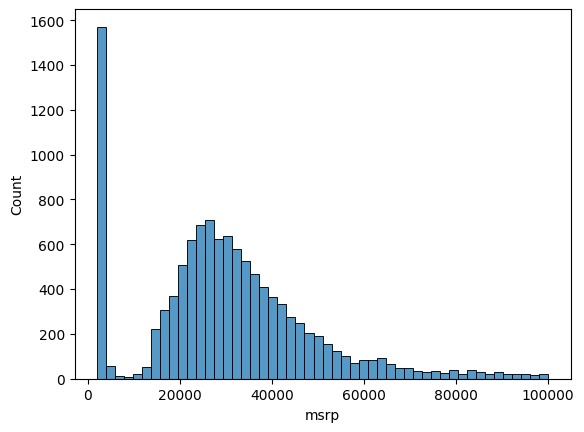

In [18]:
# Let's limit x-axis to 100,000 and zoom in to see the distribution better
# Just discard long tail for better visualization for now
sns.histplot(df.msrp[df.msrp < 100000], bins=50)

In [19]:
np.log([0 + 1, 1+ 1, 10 + 1, 1000 + 1, 100000])

array([ 0.        ,  0.69314718,  2.39789527,  6.90875478, 11.51292546])

In [20]:
# Having a long tail can be problematic for regression models
# Let's try to rid of this long tail and use log transformation to reduce the effect of outliers
np.log1p([0, 1, 10, 1000, 100000])

array([ 0.        ,  0.69314718,  2.39789527,  6.90875478, 11.51293546])

In [21]:
price_logs = np.log1p(df.msrp)

In [22]:
price_logs

0        10.739349
1        10.612779
2        10.500977
3        10.290483
4        10.448744
           ...    
11909    10.739024
11910    10.945018
11911    10.832122
11912    10.838031
11913    10.274913
Name: msrp, Length: 11914, dtype: float64

<Axes: xlabel='msrp', ylabel='Count'>

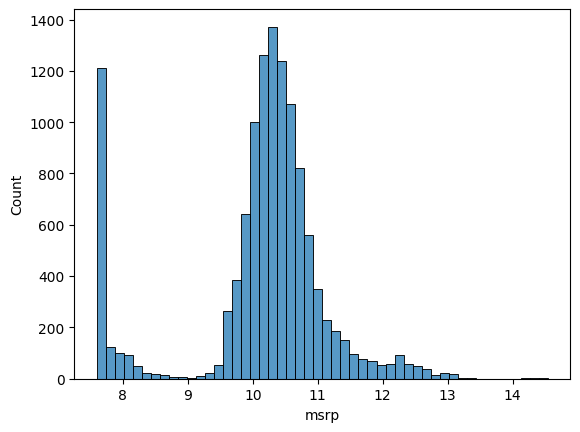

In [23]:
sns.histplot(price_logs, bins=50)
# Now it looks more like normal distribution

Missing values

In [24]:
# Let's check for missing values and sum by column
df.isnull().sum()

make                    0
model                   0
year                    0
engine_fuel_type        3
engine_hp              69
engine_cylinders       30
transmission_type       0
driven_wheels           0
number_of_doors         6
market_category      3742
vehicle_size            0
vehicle_style           0
highway_mpg             0
city_mpg                0
popularity              0
msrp                    0
dtype: int64

## 2.4 Setting up the validation framework

At first we will do next split:

* 60% - Train dataset
* 20% - Validation dataset
* 20% - Test dataset

In [25]:
n = len(df) # size of the whole dataset

n_val = int(n * 0.2) # size of validation set, rounded to integer by int()
n_test = int(n * 0.2)
n_train = n - n_val - n_test

In [26]:
n, n_train + n_val + n_test

(11914, 11914)

In [27]:
# sizes of our datasets
n_val, n_test, n_train

(2382, 2382, 7150)

In [28]:
df.iloc[[10, 0, 3, 5]]

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,msrp
10,bmw,1_series,2013,premium_unleaded_(required),300.0,6.0,manual,rear_wheel_drive,2.0,"luxury,high-performance",compact,coupe,28,20,3916,39600
0,bmw,1_series_m,2011,premium_unleaded_(required),335.0,6.0,manual,rear_wheel_drive,2.0,"factory_tuner,luxury,high-performance",compact,coupe,26,19,3916,46135
3,bmw,1_series,2011,premium_unleaded_(required),230.0,6.0,manual,rear_wheel_drive,2.0,"luxury,performance",compact,coupe,28,18,3916,29450
5,bmw,1_series,2012,premium_unleaded_(required),230.0,6.0,manual,rear_wheel_drive,2.0,"luxury,performance",compact,coupe,28,18,3916,31200


In [29]:
df.iloc[10:13]

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,msrp
10,bmw,1_series,2013,premium_unleaded_(required),300.0,6.0,manual,rear_wheel_drive,2.0,"luxury,high-performance",compact,coupe,28,20,3916,39600
11,bmw,1_series,2013,premium_unleaded_(required),230.0,6.0,manual,rear_wheel_drive,2.0,"luxury,performance",compact,coupe,28,19,3916,31500
12,bmw,1_series,2013,premium_unleaded_(required),300.0,6.0,manual,rear_wheel_drive,2.0,"luxury,performance",compact,convertible,28,19,3916,44400


In [30]:
df_train = df.iloc[:n_train] #from the beginning to n_train (not including n_train)
df_val = df.iloc[n_train:n_train+n_val]
df_test = df.iloc[n_train+n_val:] #from n_train + n_val to the end

BUT!!! We have a problem here, those elements in datasets are sequential. 

We need to shuffle those records to be sure they are not ordered. We need to break any accidental order in our data.

In [31]:
idx = np.arange(n)

In [32]:
np.random.seed(2)
np.random.shuffle(idx)

In [33]:
df_train = df.iloc[idx[:n_train]]
df_val = df.iloc[idx[n_train:n_train+n_val]]
df_test = df.iloc[idx[n_train+n_val:]]

In [34]:
df_train.head()

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,msrp
2735,chevrolet,cobalt,2008,regular_unleaded,148.0,4.0,manual,front_wheel_drive,2.0,NaN,compact,coupe,33,24,1385,14410
6720,toyota,matrix,2012,regular_unleaded,132.0,4.0,automatic,front_wheel_drive,4.0,hatchback,compact,4dr_hatchback,32,25,2031,19685
5878,subaru,impreza,2016,regular_unleaded,148.0,4.0,automatic,all_wheel_drive,4.0,hatchback,compact,4dr_hatchback,37,28,640,19795
11190,volkswagen,vanagon,1991,regular_unleaded,90.0,4.0,manual,rear_wheel_drive,3.0,NaN,large,passenger_minivan,18,16,873,2000
4554,ford,f-150,2017,flex-fuel_(unleaded/e85),385.0,8.0,automatic,four_wheel_drive,4.0,flex_fuel,large,crew_cab_pickup,21,15,5657,56260


In [35]:
len(df_train), len(df_val), len(df_test)

(7150, 2382, 2382)

In [36]:
# Resetting original indices
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

In [37]:
y_train = np.log1p(df_train.msrp.values)
y_val = np.log1p(df_val.msrp.values)
y_test = np.log1p(df_test.msrp.values)

In [38]:
# Very important to delete the target variable from the datasets
del df_train['msrp']
del df_val['msrp']
del df_test['msrp']

In [39]:
len(y_train)

7150

## 2.5 Linear regression on one single example - training part!

Here we are using training dataset only!

In [40]:
df_train.head(3)

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity
0,chevrolet,cobalt,2008,regular_unleaded,148.0,4.0,manual,front_wheel_drive,2.0,NaN,compact,coupe,33,24,1385
1,toyota,matrix,2012,regular_unleaded,132.0,4.0,automatic,front_wheel_drive,4.0,hatchback,compact,4dr_hatchback,32,25,2031
2,subaru,impreza,2016,regular_unleaded,148.0,4.0,automatic,all_wheel_drive,4.0,hatchback,compact,4dr_hatchback,37,28,640


In [41]:
# Let's look at the 10th row of the training dataset
df_train.iloc[10]

make                                 rolls-royce
model                     phantom_drophead_coupe
year                                        2015
engine_fuel_type     premium_unleaded_(required)
engine_hp                                  453.0
engine_cylinders                            12.0
transmission_type                      automatic
driven_wheels                   rear_wheel_drive
number_of_doors                              2.0
market_category        exotic,luxury,performance
vehicle_size                               large
vehicle_style                        convertible
highway_mpg                                   19
city_mpg                                      11
popularity                                    86
Name: 10, dtype: object

Let's take engine_hp, city_mpg, and popularity just to make it shorter.

In [42]:
xi = [453, 11, 86]

In [43]:
# This is what we will implementg
def  g(xi):
    # do something
    return 10000

In [44]:
g(xi)

10000

Now let's implement linear regression

In [45]:
xi = [453, 11, 86]
w0 = 0
w = [1, 1, 1]

In [46]:
range(len(xi))

range(0, 3)

In [47]:
def linear_regression(xi):
    n = len(xi)

    pred = w0

    for j in range(n):
        pred = pred + w[j] * xi[j]
    return pred

In [48]:
linear_regression(xi)

550

In [49]:
xi = [453, 11, 86]
w0 = 7.17
w = [0.01, 0.04, 0.002]

In [50]:
linear_regression(xi)

12.312

In [51]:
# The value we got is in log scale, so need to convert it back using exponential function minus 1
np.expm1(12.312)

np.float64(222347.2221101062)

In [52]:
np.log1p(222347.2221101062)

np.float64(12.312)

## 2.6 Linear regression in vector form

In [53]:
# Function to compute dot product
def dot(xi, w):
    n = len(xi)
    
    res = 0.0
    
    for j in range(n):
        res = res + xi[j] * w[j]
    
    return res

In [54]:
def linear_regression(xi):
    return w0 + dot(xi, w)

In [55]:
w_new = [w0] + w

In [56]:
w_new

[7.17, 0.01, 0.04, 0.002]

In [57]:
def linear_regression(xi):
    xi = [1] + xi
    return dot(xi, w_new)

In [58]:
linear_regression(xi)

12.312

In [59]:
w0 = 7.17
w = [0.01, 0.04, 0.002]
w_new = [w0] + w

In [60]:
x1  = [1, 148, 24, 1385]
x2  = [1, 132, 25, 2031]
x10 = [1, 453, 11, 86]

X = [x1, x2, x10]
X = np.array(X)
X

array([[   1,  148,   24, 1385],
       [   1,  132,   25, 2031],
       [   1,  453,   11,   86]])

In [61]:
def linear_regression(X):
    return X.dot(w_new)

In [62]:
linear_regression(X)

array([12.38 , 13.552, 12.312])

## 2.7 Training a linear regression model
And how to come up with values for w

In [63]:
def train_linear_regression(X, y):
    pass

In [64]:
X = [
    [148, 24, 1385],
    [132, 25, 2031],
    [453, 11, 86], 
    [158, 24, 185],
    [172, 25, 201],
    [413, 11, 86],
    [38,  54, 185],
    [142, 25, 431],
    [453, 31, 86],
]

X = np.array(X)
X

array([[ 148,   24, 1385],
       [ 132,   25, 2031],
       [ 453,   11,   86],
       [ 158,   24,  185],
       [ 172,   25,  201],
       [ 413,   11,   86],
       [  38,   54,  185],
       [ 142,   25,  431],
       [ 453,   31,   86]])

In [65]:
X.shape[0]  # number of rows
X.shape[1]  # number of columns
X.shape[0], X.shape[1]

(9, 3)

In [66]:
ones = np.ones(X.shape[0]) # create an array of ones
ones

array([1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [67]:
# Overwrite X by adding a column of ones at the beginning
# X = np.column_stack([ones, X]) # We will do it inside the function later

In [68]:
X

array([[ 148,   24, 1385],
       [ 132,   25, 2031],
       [ 453,   11,   86],
       [ 158,   24,  185],
       [ 172,   25,  201],
       [ 413,   11,   86],
       [  38,   54,  185],
       [ 142,   25,  431],
       [ 453,   31,   86]])

In [69]:
y = [10000, 20000, 15000, 20050, 10000, 20000, 15000, 25000, 12000]
y = np.array(y)
y

array([10000, 20000, 15000, 20050, 10000, 20000, 15000, 25000, 12000])

In [70]:
# Let's implement gram matrix
XTX = X.T.dot(X)

In [71]:
XTX

array([[ 696471,   44115,  718540],
       [  44115,    7146,  118803],
       [ 718540,  118803, 6359986]])

In [72]:
# Let's compute inverse of the gram matrix XTX|
XTX_inv = np.linalg.inv(XTX)
XTX_inv

array([[ 2.35803616e-06, -1.46900642e-05,  8.00007928e-09],
       [-1.46900642e-05,  2.94487947e-04, -3.84130606e-06],
       [ 8.00007928e-09, -3.84130606e-06,  2.28083884e-07]])

In [73]:
# Check by multiplying the inverse by the original matrix
XTX_inv.dot(XTX).round(1)

array([[ 1.,  0.,  0.],
       [-0.,  1.,  0.],
       [ 0.,  0.,  1.]])

In [74]:
XTX.dot(XTX_inv).round(1)

array([[ 1.,  0.,  0.],
       [-0.,  1.,  0.],
       [ 0.,  0.,  1.]])

In [75]:
# XTX = X.T.dot(X)
# XTX_inv = np.linalg.inv(XTX)
w_full = XTX_inv.dot(X.T).dot(y)

In [76]:
# Decompose w_full into w0 and w
w0 = w_full[0]
w = w_full[1:]

In [77]:
w0, w

(np.float64(26.08419497680291), array([286.12285934,   3.93813107]))

In [78]:
# Let's put everything together into a function
def train_linear_regression(X, y):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    XTX_inv = np.linalg.inv(XTX)
    w_full = XTX_inv.dot(X.T).dot(y)
    
    return w_full[0], w_full[1:]

In [79]:
np.shape(X)

(9, 3)

In [80]:
train_linear_regression(X, y)

(np.float64(25844.754055766753),
 array([ -16.08906468, -199.47254894,   -1.22802883]))

## 2.8 Car price baseline model

In [81]:
df_train.head()

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity
0,chevrolet,cobalt,2008,regular_unleaded,148.0,4.0,manual,front_wheel_drive,2.0,NaN,compact,coupe,33,24,1385
1,toyota,matrix,2012,regular_unleaded,132.0,4.0,automatic,front_wheel_drive,4.0,hatchback,compact,4dr_hatchback,32,25,2031
2,subaru,impreza,2016,regular_unleaded,148.0,4.0,automatic,all_wheel_drive,4.0,hatchback,compact,4dr_hatchback,37,28,640
3,volkswagen,vanagon,1991,regular_unleaded,90.0,4.0,manual,rear_wheel_drive,3.0,NaN,large,passenger_minivan,18,16,873
4,ford,f-150,2017,flex-fuel_(unleaded/e85),385.0,8.0,automatic,four_wheel_drive,4.0,flex_fuel,large,crew_cab_pickup,21,15,5657


In [82]:
df_train.columns

Index(['make', 'model', 'year', 'engine_fuel_type', 'engine_hp',
       'engine_cylinders', 'transmission_type', 'driven_wheels',
       'number_of_doors', 'market_category', 'vehicle_size', 'vehicle_style',
       'highway_mpg', 'city_mpg', 'popularity'],
      dtype='object')

In [83]:
df_train.dtypes

make                  object
model                 object
year                   int64
engine_fuel_type      object
engine_hp            float64
engine_cylinders     float64
transmission_type     object
driven_wheels         object
number_of_doors      float64
market_category       object
vehicle_size          object
vehicle_style         object
highway_mpg            int64
city_mpg               int64
popularity             int64
dtype: object

In [84]:
# Let's build a model using only numeric features for now
# create a list of numeric features names
base = ['engine_hp', 'engine_cylinders', 'highway_mpg',
        'city_mpg', 'popularity']

In [85]:
df_train[base].head(3)

,engine_hp,engine_cylinders,highway_mpg,city_mpg,popularity
0,148.0,4.0,33,24,1385
1,132.0,4.0,32,25,2031
2,148.0,4.0,37,28,640


In [86]:
X_train = df_train[base].values # extract the numbers as numpy array
X_train

array([[ 148.,    4.,   33.,   24., 1385.],
       [ 132.,    4.,   32.,   25., 2031.],
       [ 148.,    4.,   37.,   28.,  640.],
       ...,
       [ 285.,    6.,   22.,   17.,  549.],
       [ 563.,   12.,   21.,   13.,   86.],
       [ 200.,    4.,   31.,   22.,  873.]], shape=(7150, 5))

In [87]:
# y_train extracted before as y_train = np.log1p(df_train.msrp.values)
y_train

array([ 9.57574708,  9.887663  ,  9.89323518, ..., 10.45380308,
       12.62248099, 10.54061978], shape=(7150,))

Let's train a model!

In [88]:
train_linear_regression(X_train, y_train)

(np.float64(nan), array([nan, nan, nan, nan, nan]))

We can see there is a problem: we have "nans" here because we have missing values! So we need to do something with this missing values.

In [89]:
df_train[base].isnull().sum()

engine_hp           40
engine_cylinders    14
highway_mpg          0
city_mpg             0
popularity           0
dtype: int64

In [90]:
df_train[base].fillna(0) #filling missing values with 0 we make the model ignore missing values

,engine_hp,engine_cylinders,highway_mpg,city_mpg,popularity
0,148.0,4.0,33,24,1385
1,132.0,4.0,32,25,2031
2,148.0,4.0,37,28,640
3,90.0,4.0,18,16,873
4,385.0,8.0,21,15,5657
...,...,...,...,...,...
7145,300.0,6.0,31,20,3916
7146,210.0,4.0,30,24,873
7147,285.0,6.0,22,17,549
7148,563.0,12.0,21,13,86


In [91]:
X_train = df_train[base].fillna(0).values
train_linear_regression(X_train, y_train)

(np.float64(7.927257388069986),
 array([ 9.70589522e-03, -1.59103494e-01,  1.43792133e-02,  1.49441072e-02,
        -9.06908672e-06]))

In [92]:

X_train = df_train[base].fillna(0).values

w0, w = train_linear_regression(X_train, y_train)

y_pred = w0 + X_train.dot(w)

In [93]:
w0

np.float64(7.927257388069986)

In [94]:
w

array([ 9.70589522e-03, -1.59103494e-01,  1.43792133e-02,  1.49441072e-02,
       -9.06908672e-06])

<Axes: ylabel='Count'>

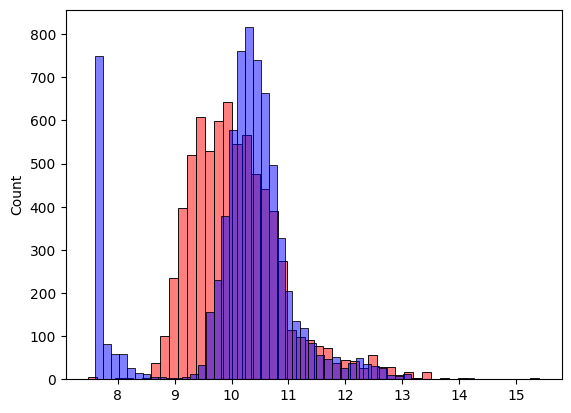

In [95]:
# Let's visualize the predictions vs actual values
sns.histplot(y_pred, color='red', alpha=0.5, bins=50)
sns.histplot(y_train, color='blue', alpha=0.5, bins=50)


Here we can see that the peak of predictions did not match target distribution, in many cases our model predicts smaller number than it actually is. So our model might not be ideal and we need to have an objective way to say if our model good or not good (we need objective criteria of results evaluation).

## 2.9 RMSE - Root Mean Squared Error

In [96]:
def rmse(y, y_pred):
    se = (y - y_pred) ** 2
    mse = se.mean()
    return np.sqrt(mse)

In [97]:
rmse(y_train, y_pred)

np.float64(0.7554192603920132)

## 2.10 Validating the model

In [98]:
def prepare_X(df):
    df_num = df[base] # select numeric columns
    df_num = df_num.fillna(0) # fill missing values with 0
    X = df_num.values # extract numpy array - feature matrix
    return X

In [99]:
# Training part - only using train dataset
X_train = prepare_X(df_train)
w0, w = train_linear_regression(X_train, y_train)

# Validation part
X_val = prepare_X(df_val) # prepare validation feature matrix in the same way as training feature matrix
y_pred = w0 + X_val.dot(w) # apply the model to validation feature matrix to make predictions
rmse(y_val, y_pred) # evaluate the model performance on validation set

np.float64(0.761653099130156)

## 2.11 Simple feature engineering

In [100]:
df_train

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity
0,chevrolet,cobalt,2008,regular_unleaded,148.0,4.0,manual,front_wheel_drive,2.0,NaN,compact,coupe,33,24,1385
1,toyota,matrix,2012,regular_unleaded,132.0,4.0,automatic,front_wheel_drive,4.0,hatchback,compact,4dr_hatchback,32,25,2031
2,subaru,impreza,2016,regular_unleaded,148.0,4.0,automatic,all_wheel_drive,4.0,hatchback,compact,4dr_hatchback,37,28,640
3,volkswagen,vanagon,1991,regular_unleaded,90.0,4.0,manual,rear_wheel_drive,3.0,NaN,large,passenger_minivan,18,16,873
4,ford,f-150,2017,flex-fuel_(unleaded/e85),385.0,8.0,automatic,four_wheel_drive,4.0,flex_fuel,large,crew_cab_pickup,21,15,5657
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7145,bmw,4_series,2015,premium_unleaded_(required),300.0,6.0,automatic,rear_wheel_drive,2.0,"luxury,performance",midsize,convertible,31,20,3916
7146,volkswagen,beetle,2015,premium_unleaded_(recommended),210.0,4.0,automated_manual,front_wheel_drive,2.0,"hatchback,performance",compact,2dr_hatchback,30,24,873
7147,gmc,sierra_1500,2015,flex-fuel_(unleaded/e85),285.0,6.0,automatic,four_wheel_drive,4.0,flex_fuel,large,extended_cab_pickup,22,17,549
7148,rolls-royce,ghost,2014,premium_unleaded_(required),563.0,12.0,automatic,rear_wheel_drive,4.0,"exotic,luxury,performance",large,sedan,21,13,86


In [101]:
df_train.year.max() - df_train.year

0        9
1        5
2        1
3       26
4        0
        ..
7145     2
7146     2
7147     2
7148     3
7149     0
Name: year, Length: 7150, dtype: int64

In [102]:
# Let's add car age as a new feature using function we wrote earlier
def prepare_X(df):
    df = df.copy() # make a copy to avoid changing the original dataframe by this function
    # inside this function we are working with a copy of the dataframe
    df['age'] = df_train.year.max() - df['year']
    features = base + ['age']
    
    df_num = df[features]
    df_num = df_num.fillna(0)
    X = df_num.values

    return X

In [103]:
X_train = prepare_X(df_train)

In [104]:
df_train.columns

Index(['make', 'model', 'year', 'engine_fuel_type', 'engine_hp',
       'engine_cylinders', 'transmission_type', 'driven_wheels',
       'number_of_doors', 'market_category', 'vehicle_size', 'vehicle_style',
       'highway_mpg', 'city_mpg', 'popularity'],
      dtype='object')

In [105]:
X_train = prepare_X(df_train)
w0, w = train_linear_regression(X_train, y_train)

X_val = prepare_X(df_val)
y_pred = w0 + X_val.dot(w)
rmse(y_val, y_pred)

np.float64(0.5172055461058299)

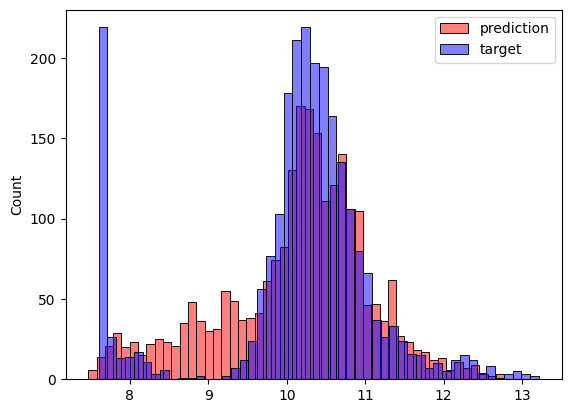

In [106]:
# Now we can see that adding age feature improved the model performance (above number) and we can see it on the plot below as well
sns.histplot(y_pred, label='prediction', color='red', alpha=0.5, bins=50)
sns.histplot(y_val, label='target', color='blue',  alpha=0.5, bins=50)
plt.legend()

But we still have some room for improvement!

## 2.12 Categorical variables

Categorical variables are features that represent discrete groups or categories rather than numeric values, **usually they are strings**. They describe qualities, labels, or classes.
Since most machine learning algorithms expect numerical input, categorical features need to be converted into numbers before modeling. This process is called **encoding**.

In [107]:
df_train.dtypes
# all things that have type 'object' are categorical

make                  object
model                 object
year                   int64
engine_fuel_type      object
engine_hp            float64
engine_cylinders     float64
transmission_type     object
driven_wheels         object
number_of_doors      float64
market_category       object
vehicle_size          object
vehicle_style         object
highway_mpg            int64
city_mpg               int64
popularity             int64
dtype: object

In [108]:
# number of doors is actyally categorical because it represents discrete groups of cars
df_train.number_of_doors

0       2.0
1       4.0
2       4.0
3       3.0
4       4.0
       ... 
7145    2.0
7146    2.0
7147    4.0
7148    4.0
7149    4.0
Name: number_of_doors, Length: 7150, dtype: float64

We represent one categorical variables column as multiple binary (0/1) columns using.

In [109]:
(df_train.number_of_doors == 2).astype('int')
# Also we can do the same for other values like 3, 4, 5 doors etc

0       1
1       0
2       0
3       0
4       0
       ..
7145    1
7146    1
7147    0
7148    0
7149    0
Name: number_of_doors, Length: 7150, dtype: int64

In [110]:
## Let's write such columns back to the dataframe
#df_train['num_doors_2'] = (df_train.number_of_doors == 2).astype('int')
#df_train['num_doors_3'] = (df_train.number_of_doors == 3).astype('int')
#df_train['num_doors_4'] = (df_train.number_of_doors == 4).astype('int')

# instead of adding them one by one, we can do it in a loop as well
for val in [2, 3, 4]:
    df_train['num_doors_%s' % val] = (df_train.number_of_doors == val).astype('int')  

In [111]:
df_train.head(2)

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,num_doors_2,num_doors_3,num_doors_4
0,chevrolet,cobalt,2008,regular_unleaded,148.0,4.0,manual,front_wheel_drive,2.0,NaN,compact,coupe,33,24,1385,1,0,0
1,toyota,matrix,2012,regular_unleaded,132.0,4.0,automatic,front_wheel_drive,4.0,hatchback,compact,4dr_hatchback,32,25,2031,0,0,1


In [112]:
'num_doors_%s' % 3

'num_doors_3'

In [113]:
# Let's remove the columns we just added to avoid duplication when we run function later
#del df_train['num_doors_%s'] 
#del df_train['num_doors_%s % val'] 
for val in [2, 3, 4]:
    del df_train['num_doors_%s' % val]  

In [114]:
df_train.columns

Index(['make', 'model', 'year', 'engine_fuel_type', 'engine_hp',
       'engine_cylinders', 'transmission_type', 'driven_wheels',
       'number_of_doors', 'market_category', 'vehicle_size', 'vehicle_style',
       'highway_mpg', 'city_mpg', 'popularity'],
      dtype='object')

In [115]:
categorical_columns = [
    'make', 'model', 'engine_fuel_type', 'driven_wheels', 'market_category',
    'vehicle_size', 'vehicle_style']

categorical = {}

for c in categorical_columns:
    categorical[c] = list(df_train[c].value_counts().head().index)

In [134]:
def prepare_X(df):
    df = df.copy()
    
    df['age'] = df_train.year.max() - df['year']
    features = base + ['age']

    for v in [2, 3, 4]:
        df['num_doors_%d' % v] = (df.number_of_doors == v).astype(int)
        features.append('num_doors_%d' % v)

    for name, values in categorical.items():
        for value in values:
            df['%s_%s' % (name, value)] = (df[name] == value).astype(int)
            features.append('%s_%s' % (name, value))

    df_num = df[features]
    df_num = df_num.fillna(0)
    X = df_num.values

    return X

In [135]:
X_train = prepare_X(df_train)
w0, w = train_linear_regression(X_train, y_train)

X_val = prepare_X(df_val)
y_pred = w0 + X_val.dot(w)
rmse(y_val, y_pred)

np.float64(53.70370772576197)

In [77]:
w0, w

(3066759258862621.0,
 array([-7.90863204e-01,  1.80621909e+02,  1.97903973e+01,  1.46968041e+01,
        -3.39713455e-04,  7.74924546e+00,  9.76297867e+03,  9.83480038e+03,
         9.77003629e+03, -2.36936868e+01, -6.98582110e+00,  7.93435108e+01,
        -7.33167695e+01, -6.60897799e+00, -1.00310530e+01,  7.79383982e+01,
        -4.19367134e+01, -6.14213575e+01,  2.12412304e+02,  1.02166851e+03,
         9.08719092e+02,  9.84633740e+02,  1.06771237e+03,  7.00547494e+02,
        -3.06675926e+15, -3.06675926e+15, -3.06675926e+15, -3.06675926e+15,
         2.52356626e+00,  3.40712703e+00, -1.27416249e+01,  1.22844560e+01,
        -1.51620939e+01,  3.09315910e+02,  2.88692636e+02,  2.78158171e+02,
        -1.44115660e-01, -2.62579827e-02,  1.75913981e-01,  3.65037816e-01,
        -2.90235596e-01]))

## 2.13 Regularization

In [78]:
X = [
    [4, 4, 4],
    [3, 5, 5],
    [5, 1, 1],
    [5, 4, 4],
    [7, 5, 5],
    [4, 5, 5.00000001],
]

X = np.array(X)
X

array([[4.        , 4.        , 4.        ],
       [3.        , 5.        , 5.        ],
       [5.        , 1.        , 1.        ],
       [5.        , 4.        , 4.        ],
       [7.        , 5.        , 5.        ],
       [4.        , 5.        , 5.00000001]])

In [79]:
y= [1, 2, 3, 1, 2, 3]

In [80]:
XTX = X.T.dot(X)
XTX

array([[140.        , 111.        , 111.00000004],
       [111.        , 108.        , 108.00000005],
       [111.00000004, 108.00000005, 108.0000001 ]])

In [81]:
XTX_inv = np.linalg.inv(XTX)

In [82]:
XTX_inv

array([[ 3.85321698e-02,  1.20696663e+05, -1.20696696e+05],
       [ 1.20696640e+05, -2.74658839e+14,  2.74658839e+14],
       [-1.20696680e+05,  2.74658839e+14, -2.74658839e+14]])

In [83]:
XTX_inv.dot(X.T).dot(y)

array([ 6.24269892e-01,  3.44329390e+06, -3.44329299e+06])

In [84]:
XTX = [
    [1, 2, 2],
    [2, 1, 1.0000001],
    [2, 1.0000001, 1]
]

XTX = np.array(XTX)

In [85]:
np.linalg.inv(XTX)

array([[-3.33333356e-01,  3.33333339e-01,  3.33333339e-01],
       [ 3.33333339e-01, -5.00000008e+06,  4.99999991e+06],
       [ 3.33333339e-01,  4.99999991e+06, -5.00000008e+06]])

In [86]:
XTX = XTX + 0.01 * np.eye(3)

In [87]:
np.linalg.inv(XTX)

array([[ -0.33668908,   0.33501399,   0.33501399],
       [  0.33501399,  49.91590897, -50.08509104],
       [  0.33501399, -50.08509104,  49.91590897]])

In [88]:
def train_linear_regression_reg(X, y, r=0.001):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    XTX = XTX + r * np.eye(XTX.shape[0])

    XTX_inv = np.linalg.inv(XTX)
    w_full = XTX_inv.dot(X.T).dot(y)
    
    return w_full[0], w_full[1:]

In [89]:
X_train = prepare_X(df_train)
w0, w = train_linear_regression_reg(X_train, y_train, r=0.01)

X_val = prepare_X(df_val)
y_pred = w0 + X_val.dot(w)
rmse(y_val, y_pred)

0.4608208286209523

## 2.14 Tuning the model

In [90]:
for r in [0.0, 0.00001, 0.0001, 0.001, 0.1, 1, 10]:
    X_train = prepare_X(df_train)
    w0, w = train_linear_regression_reg(X_train, y_train, r=r)

    X_val = prepare_X(df_val)
    y_pred = w0 + X_val.dot(w)
    score = rmse(y_val, y_pred)
    
    print(r, w0, score)

0.0 3066759258862621.0 266.5994263627081
1e-05 6.6398149018651305 0.46081532123609276
0.0001 7.12965014007955 0.4608153659783837
0.001 7.13085491393288 0.46081585838957173
0.1 7.0002324128629025 0.4608736549134577
1 6.250747846974607 0.46158128382779856
10 4.7295125856710305 0.472609877266903


In [91]:
r = 0.001
X_train = prepare_X(df_train)
w0, w = train_linear_regression_reg(X_train, y_train, r=r)

X_val = prepare_X(df_val)
y_pred = w0 + X_val.dot(w)
score = rmse(y_val, y_pred)
score

0.46081585838957173

## 2.15 Using the model

In [92]:
df_full_train = pd.concat([df_train, df_val])

In [93]:
df_full_train = df_full_train.reset_index(drop=True)

In [94]:
X_full_train = prepare_X(df_full_train)

In [95]:
X_full_train

array([[148.,   4.,  33., ...,   1.,   0.,   0.],
       [132.,   4.,  32., ...,   0.,   0.,   1.],
       [148.,   4.,  37., ...,   0.,   0.,   1.],
       ...,
       [332.,   8.,  23., ...,   0.,   0.,   0.],
       [148.,   4.,  34., ...,   0.,   0.,   0.],
       [290.,   6.,  25., ...,   0.,   0.,   0.]])

In [96]:
y_full_train = np.concatenate([y_train, y_val])

In [97]:
w0, w = train_linear_regression_reg(X_full_train, y_full_train, r=0.001)

In [98]:
X_test = prepare_X(df_test)
y_pred = w0 + X_test.dot(w)
score = rmse(y_test, y_pred)
score

0.4600753970266562

In [99]:
car = df_test.iloc[20].to_dict()
car

{'make': 'toyota',
 'model': 'sienna',
 'year': 2015,
 'engine_fuel_type': 'regular_unleaded',
 'engine_hp': 266.0,
 'engine_cylinders': 6.0,
 'transmission_type': 'automatic',
 'driven_wheels': 'front_wheel_drive',
 'number_of_doors': 4.0,
 'market_category': nan,
 'vehicle_size': 'large',
 'vehicle_style': 'passenger_minivan',
 'highway_mpg': 25,
 'city_mpg': 18,
 'popularity': 2031}

In [100]:
df_small = pd.DataFrame([car])
df_small

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity
0,toyota,sienna,2015,regular_unleaded,266.0,6.0,automatic,front_wheel_drive,4.0,NaN,large,passenger_minivan,25,18,2031


In [101]:
X_small = prepare_X(df_small)

In [102]:
y_pred = w0 + X_small.dot(w)
y_pred = y_pred[0]
y_pred

10.63249250912739

In [103]:
np.expm1(y_pred)

41459.336786653585

In [104]:
np.expm1(y_test[20])

35000.00000000001

## 2.16 Next steps

* We included only 5 top features. What happens if we include 10?

Other projects

* Predict the price of a house - e.g. boston dataset
* https://archive.ics.uci.edu/ml/datasets.php?task=reg
* https://archive.ics.uci.edu/ml/datasets/Student+Performance

## 2.17 Summary

* EDA - looking at data, finding missing values
* Target variable distribution - long tail => bell shaped curve
* Validation framework: train/val/test split (helped us detect problems)
* Normal equation - not magic, but math
* Implemented it with numpy
* RMSE to validate our model
* Feature engineering: age, categorical features
* Regularization to fight numerical instability